In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('EDA Data.csv')
df.columns


Index(['Unnamed: 0', 'Job Title', 'Job Description', 'Rating', 'Location',
       'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Competitors', 'job_simp', 'seniority', 'hourly',
       'employer provided', 'Avg_Salary', 'company', 'same_state', 'state',
       'company_age', 'python_yn', 'vis_yn', 'sql_yn', 'R_yn', 'PySpark_yn',
       'ML_yn', 'BigData_yn', 'rating', 'job_desc', 'adv_degree',
       'compete_num'],
      dtype='object')

In [2]:
# Choosing relevant columns for modelling

df_model = df[['Avg_Salary','rating','Size','Industry','Type of ownership','Sector', 'Revenue','compete_num',
            'hourly','employer provided','same_state','Location', 'company_age', 'python_yn',
            'ML_yn','adv_degree', 'PySpark_yn','job_simp', 'seniority']]
df_model

,Avg_Salary,rating,Size,Industry,Type of ownership,Sector,Revenue,compete_num,hourly,employer provided,same_state,Location,company_age,python_yn,ML_yn,adv_degree,PySpark_yn,job_simp,seniority
0,72.0,3.8,501 to 1000 employees,Aerospace & Defense,Company - Private,Aerospace & Defense,$50 to $100 million (USD),0,0,0,0,"Albuquerque, NM",47,1,1,0,0,data scientist,na
1,87.5,3.4,10000+ employees,Health Care Services & Hospitals,Other Organization,Health Care,$2 to $5 billion (USD),0,0,0,0,"Linthicum, MD",36,1,1,0,0,data scientist,na
2,85.0,4.8,501 to 1000 employees,Security Services,Company - Private,Business Services,$100 to $500 million (USD),0,0,0,1,"Clearwater, FL",10,1,1,1,1,data scientist,na
3,76.5,3.8,1001 to 5000 employees,Energy,Government,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),3,0,0,1,"Richland, WA",55,1,1,0,0,data scientist,na
4,114.5,2.9,51 to 200 employees,Advertising & Marketing,Company - Private,Business Services,Unknown / Non-Applicable,3,0,0,1,"New York, NY",22,1,1,0,0,data scientist,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,84.5,3.9,10000+ employees,Biotech & Pharmaceuticals,Company - Public,Biotech & Pharmaceuticals,$10+ billion (USD),3,0,0,0,"Cambridge, MA",190,0,0,0,0,na,senior
737,102.5,4.4,1001 to 5000 employees,Internet,Company - Public,Information Technology,$100 to $500 million (USD),3,0,0,0,"Nashville, TN",14,1,1,0,1,data engineer,senior
738,73.5,2.6,501 to 1000 employees,Colleges & Universities,College / University,Education,Unknown / Non-Applicable,0,0,0,1,"Pittsburgh, PA",36,0,1,1,0,na,na
739,127.5,3.2,1 to 50 employees,Staffing & Outsourcing,Company - Private,Business Services,$5 to $10 million (USD),0,0,0,0,"Allentown, PA",0,0,1,0,0,manager,na


In [3]:
# Get Dummies for strings

df_dum = pd.get_dummies(df_model)

df_dum.shape

(741, 339)

In [4]:
df_dum

,Avg_Salary,rating,compete_num,hourly,employer provided,same_state,company_age,python_yn,ML_yn,adv_degree,...,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,seniority_jr,seniority_na,seniority_senior
0,72.0,3.8,0,0,0,0,47,1,1,0,...,0,0,1,0,0,0,0,0,1,0
1,87.5,3.4,0,0,0,0,36,1,1,0,...,0,0,1,0,0,0,0,0,1,0
2,85.0,4.8,0,0,0,1,10,1,1,1,...,0,0,1,0,0,0,0,0,1,0
3,76.5,3.8,3,0,0,1,55,1,1,0,...,0,0,1,0,0,0,0,0,1,0
4,114.5,2.9,3,0,0,1,22,1,1,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,84.5,3.9,3,0,0,0,190,0,0,0,...,0,0,0,0,0,0,1,0,0,1
737,102.5,4.4,3,0,0,0,14,1,1,0,...,0,1,0,0,0,0,0,0,0,1
738,73.5,2.6,0,0,0,1,36,0,1,1,...,0,0,0,0,0,0,1,0,1,0
739,127.5,3.2,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [5]:
from sklearn.model_selection import train_test_split

x = df_dum.drop(['Avg_Salary'],axis = 1)
y = df_dum.Avg_Salary.values
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [6]:
# Linear Regression in StatsModels 

import statsmodels.api as sm
x = sm.add_constant(x) # adding a constant


model = sm.OLS(y, x).fit()
predictions = model.predict(x)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     8.797
Date:                Tue, 12 May 2020   Prob (F-statistic):           1.07e-90
Time:                        07:16:05   Log-Likelihood:                -3069.3
No. Observations:                 741   AIC:                             6711.
Df Residuals:                     455   BIC:                             8028.
Df Model:                         285                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [7]:
# Discussion based on above printed reulst from statsmodels


In [10]:
# Lasso Regression

from sklearn.linear_model import Lasso
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
la = Lasso(alpha = 0.03)

la.fit(x_train,y_train)
np.mean(cross_val_score(la,x_train,y_train,cv = 3, scoring = 'neg_mean_absolute_error'))

-19.233363872504597

In [11]:
alpha = []
error = []

for i in range (1,100):
    alpha.append(i/100)
    la2 = Lasso(alpha=(i/100)) 
    error.append(np.mean(cross_val_score(la2,x_train,y_train,cv = 3, scoring = 'neg_mean_absolute_error')))

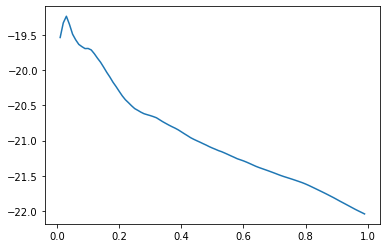

In [12]:
plt.plot(alpha,error)

In [13]:
err = tuple(zip(alpha,error))

df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
2,0.03,-19.233364


In [15]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor() 

rf.fit(x_train,y_train)

print(np.mean(cross_val_score(rf,x_train,y_train,cv = 3, scoring = 'neg_mean_absolute_error')))
print(rf.score(x_train, y_train))
print(rf.score(x_test, y_test))
y_pred = rf.predict(x_test)

print( mean_squared_error(y_test, y_pred))
print('Absolute Error:', abs(np.mean(y_pred - y_test)))

-16.01402249989623
0.9583242782604099
0.8052768795288902
302.5370610126648
Absolute Error: 0.18177860338766413


In [99]:
# GridsearchCV - Tuning Models

from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range (10,300,10), 'criterion':('mse','moe'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf, parameters, cv = 3, scoring = 'neg_mean_absolute_error')

gs.fit(x_train,y_train)

/Users/Aneesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'moe'

  FitFailedWarning)
/Users/Aneesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'moe'

  FitFailedWarning)
/Users/Aneesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'moe'

  FitFailedWarning)
/Users/Aneesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters

/Users/Aneesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'moe'

  FitFailedWarning)
/Users/Aneesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'moe'

  FitFailedWarning)
/Users/Aneesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'moe'

  FitFailedWarning)
/Users/Aneesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters

/Users/Aneesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'moe'

  FitFailedWarning)
/Users/Aneesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'moe'

  FitFailedWarning)
/Users/Aneesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'moe'

  FitFailedWarning)
/Users/Aneesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters

/Users/Aneesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'moe'

  FitFailedWarning)
/Users/Aneesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'moe'

  FitFailedWarning)
/Users/Aneesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'moe'

  FitFailedWarning)
/Users/Aneesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters

/Users/Aneesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'moe'

  FitFailedWarning)
/Users/Aneesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'moe'

  FitFailedWarning)
/Users/Aneesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'moe'

  FitFailedWarning)
/Users/Aneesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters

/Users/Aneesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'moe'

  FitFailedWarning)
/Users/Aneesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'moe'

  FitFailedWarning)
/Users/Aneesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'moe'

  FitFailedWarning)
/Users/Aneesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters

/Users/Aneesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'moe'

  FitFailedWarning)
/Users/Aneesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'moe'

  FitFailedWarning)
/Users/Aneesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'moe'

  FitFailedWarning)
/Users/Aneesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters

/Users/Aneesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'moe'

  FitFailedWarning)
/Users/Aneesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'moe'

  FitFailedWarning)
/Users/Aneesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'moe'

  FitFailedWarning)
/Users/Aneesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters

/Users/Aneesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'moe'

  FitFailedWarning)
/Users/Aneesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'moe'

  FitFailedWarning)
/Users/Aneesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'moe'

  FitFailedWarning)


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [100]:
gs.best_score_

-15.542662278471383

In [101]:
gs.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=220, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [106]:
# test ensembles 
tpred_la2 = la.predict(x_test)
tpred_rf = gs.best_estimator_.predict(x_test)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,tpred_la2))
print(mean_absolute_error(y_test,tpred_rf))

mean_absolute_error(y_test,(tpred_la2+tpred_rf)/2)

16.686390123971524
11.531466553115042


13.05156581013176

In [107]:
# Importing Pickle
# Give Credits for the Foreign guy

import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

In [108]:
file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

model.predict(np.array(list(x_test.iloc[1,:])).reshape(1,-1))[0]

list(x_test.iloc[1,:])

[4.0,
 0.0,
 0.0,
 0.0,
 0.0,
 43.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.